# 5 Best Python Synthetic Data Generators And How to Use Them When You Lack Data
## Let's get even more data
![](images/unsplash.jpg)

<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@maxberg?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Maxim Berg</a>  
    </strong>
</figcaption>

### Introduction

In 2021, 2.5 quintillion bytes (2.5 million terabytes) of data was being produced every single day. Today, it is even more. But apparently, that's not enough because Python ecosystem has a wide range of libraries to produce synthetic data. Maybe some of them are created just for the sake of being able to generate synthetic data but most have highly useful applications such as:

- Machine learning: when real-world data is not available or difficult to obtain for model training
- Data privacy and security: Replace sensitive information in datasets with realistic but not actual data
- Testing and debugging: test and debug software with synthetic data in a controlled environment
- Data augmentation: artificially generating more data points from existing data using machine learning or statistics

In this article, we will see six Python libraries for the above purposes and how to use them.

### Random user information with Faker

Faker is one of the best and early Python libraries to generate all types of random information. Some commonly-used attributes Faker generate are:

- Personal info: name, birthday, email, password, address
- All types of date and timezone information
- Financial details: credit cards, SSNs, banking
- Misc: URLs, sentences, language codes

and so on. 

It has an intuitive API as well. After initiating a `Faker` class, you can generate a new fake item by calling its method:

In [12]:
from faker import Faker

fake = Faker()
fake.name()

'Sherri Poole'

In [3]:
fake.address()

'PSC 3046, Box 1296\nAPO AA 14689'

In [4]:
fake.url()

'http://www.hall.info/'

All these methods return new items on each call, so it is easy to build a fake CSV dataset with a code snippet like below:

In [5]:
import pandas as pd

df = pd.DataFrame(
    [
        {
            "name": fake.name(),
            "address": fake.address(),
            "birthday": fake.date_of_birth(),
            "email": fake.email(),
            "password": fake.password(),
        }
        for _ in range(1000)
    ]
)

df.to_csv("data/fake.csv", index=False)

In [6]:
df.sample(5)

,name,address,birthday,email,password
383,Travis Thompson,"534 Ferguson Walk\nHuynhshire, IN 84577",1967-12-27,smitheric@example.com,)Ga7Xttc*!
334,Samantha Meyers,"6181 Cobb Island\nEast Davidport, VA 62757",1957-01-12,mckinneyanne@example.net,_qv0SZ_wI1
565,Tanya Walker,"902 Medina Harbors\nGregoryport, VI 28268",1977-01-10,sfernandez@example.com,@2#QNEk79^
6,Stephanie Silva,"3792 Matthew Plaza\nElliottview, MT 54912",1956-12-04,traceygolden@example.org,qoU0ItNni#
53,Lisa Martinez,"13291 Avila Lock Suite 499\nPort Jerrybury, OK...",1953-11-20,amyramirez@example.org,^OImgob986


If you notice, name and email addresses do not match. That's one of the disadvantages of using Faker - Faker-generated datasets are easily identifiable when used in public.

Learn more about it from [the docs](https://faker.readthedocs.io/en/master/).

### Synthetic datasets with Sklearn for ML tasks

Sklearn is such a huge and excellent library that it has a dedicated support for synthetic data generation. 

Its `datasets` module includes many functions to generate artificial datasets for a variety of machine learning tasks. The most popular functions are `make_classification` and `make_regression`.

Both have `n_samples` and `n_features` parameters to control the number of rows and features of the resulting synthetic dataset. 

In [14]:
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_classes=3, n_clusters_per_class=3
)


X, y = make_regression(n_samples=5000, n_features=20, n_informative=10)

To control the difficulty of the task, you can specify how many features are useful or redundant with `n_informative` (correlated) or `n_redundant` (linear combinations of informative features) parameters. 

`make_classification` also offers much control over the classification target, namely, the number of classes, the number of clusters per class and class weights. 

There is also the `make_blobs` function for generating clustering tasks as seen below:

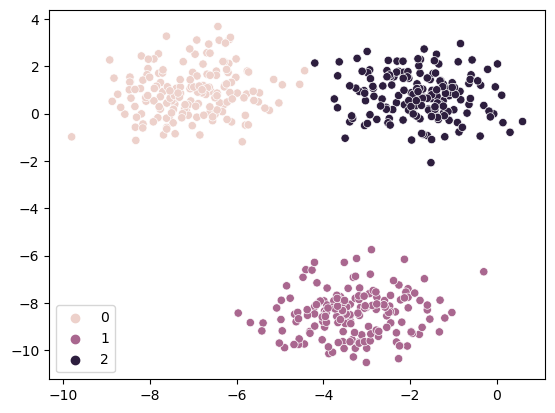

In [9]:
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2)


sns.scatterplot(X[:, 0], X[:, 1], hue=y);

If you are looking for something fancy, there are other functions such as [make_checkerboard](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_checkerboard.html), [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) and [make_s_curve](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html). 

### Dataset with outliers in PyOD

Anomaly detection is a ubiquitous problem in data science. But, quality datasets with outliers are hard to come by if you want to practice. Fortunately, the Python Outlier Detection (PyOD) library has a utility function to generate a synthetic data with outliers:

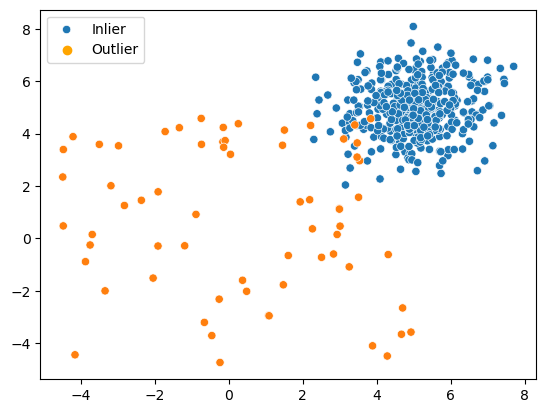

In [30]:
from pyod.utils.data import generate_data
import seaborn as sns
import matplotlib.pyplot as plt

X, y = generate_data(
    n_train=500, contamination=0.13, n_features=2, train_only=True, random_state=1
)

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
legend = plt.legend(labels=['Inlier', 'Outlier'])
legend.legendHandles[1].set_color("orange")

The `generate_data` offers control over the number of rows in training and test sets, and also the percentage of outliers in the resulting sets (`contamination`).

PyOD also has the largest suite of anomaly detection algorithms in the Python ecosystem. To learn more about it, you can check out [my anomaly detection course](https://app.datacamp.com/learn/courses/anomaly-detection-in-python) on DataCamp.

### Synthetic data on top of another dataset with CTGAN

Now, onto the great stuff. 

When you have limited data, it is hard for machine learning models to generalize well and not overfit. In such cases, you can use General General Adversial Networks - CTGAN. 

After you fit it to any dataset, it can generate synthetic samples from the dataset's information space with high anonymity. This is a great way to both increase data security and dataset size.

[CTGAN](https://github.com/sdv-dev/CTGAN) is provided by [the Synthetic Data Vault (SDV) project](https://github.com/sdv-dev). Its Python API exposes a `CTGAN` that requires the dataset to be learned and a list of its categorical columns. 

Then, you can draw as many samples from it as you want with `sample`. Below, we are sampling 20k synthetic samples from the cliche Iris dataset:

```python
import seaborn as sns
import pandas as pd
from ctgan import CTGAN
from ctgan import load_demo

# Extract categorical data types
iris = sns.load_dataset("iris")
categoricals = iris.select_dtypes(exclude="number").columns.tolist()

# Generate the data
ctgan = CTGAN(epochs=10)
ctgan.fit(iris, categoricals)

synthetic_iris = ctgan.sample(20000)
synthetic_iris.head()
```

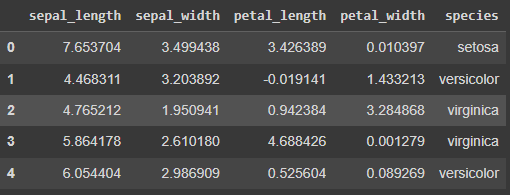

### Mimesis - Advanced Faker

Mimesis is a full-fledged random information generator built upon Faker. It can generate many, many more random attributes than Faker:

```python
from mimesis import Generic
from mimesis.locales import Locale

# Spanish locale
fake = Generic(Locale.ES)

print(dir(fake))
```

```
address     code           development  food      locale   payment  text     
binaryfile  cryptographic  file         hardware  numeric  person   transport
choice      datetime       finance      internet  path     science
```

Its random generators are grouped into 20 categories, which makes Mimesis much more organized. 

It also has great support for country-specific information for 32 locales (languages). Below, we are generating a thousand rows of fake Spanish data:

In [11]:
from mimesis import Generic
from mimesis.locales import Locale
import pandas as pd

# Spanish locale
fake = Generic(Locale.ES)

df = pd.DataFrame(
    [
        {
            "name": fake.person.full_name(),
            "country": fake.address.country(),
            "birthday": fake.datetime.date(),
            "email": fake.person.email(),
            "password": fake.person.password(),
        }
        for _ in range(1000)
    ]
)

df.head()

,name,country,birthday,email,password
0,Xalvador Rubio,España,2006-03-16,task2064@duck.com,c~9Fa+bB
1,Eduardo Sanchez,España,2015-04-03,these1985@example.com,.D*gDFY#
2,Pàola Leon,España,2005-03-29,proteins1979@example.com,a:Z]jV9j
3,Xabat Ruiz,España,2006-10-03,factor1818@protonmail.com,wwAT'<66
4,Fanuco Montero,España,2019-05-11,your2086@example.com,A[G0fbX$


You can also create custom locales where you combine multiple languages for area-specific information, i.e. data specific to western Europe for example.

Learn more about it from its [massive docs](https://mimesis.name/en/v6.0.0/index.html).

### Image augmentation with TensorFlow

One of the most effective methods to artificially increase the size of image datasets in computer vision problems is augmentation. 

The idea is simple: when you have a small image dataset, too small for a neural network to train effectively, you can increase the number of images by using a variety of random image transformations. This way, the network will have more diverse examples to train on. Common image transformations are:

- Geometric: rotation, translation, scaling, flipping - changes the size, orientation and position of objects in images

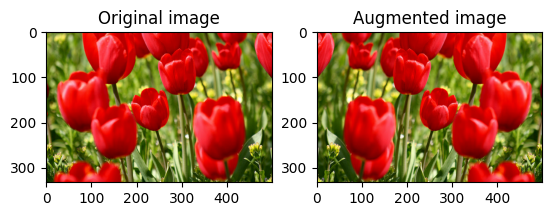

- Color and brightness: random changes in brightness and contrast to introduce more variation in lightning and color conditions

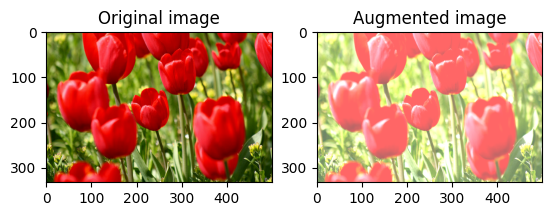

- Noise and blur: adding random noise and blurring effects to simulate different levels of image quality

Such transformations can significantly increase dataset size by introducing similar but not identical image variations. This, in turn, results in performance gains in neural networks.

Image augmentation can be performed in many ways in TensorFlow. For image classification tasks, there is the `ImageDataGenerator` class:

```python
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)
```

You initialize it and set the transformations you want. Then, you can use its `flow_from_directory` method to read images in batches from the specified data directory:

```python
train_generator = train_datagen.flow_from_directory(
    "data/raw/train",
    target_size=(50, 50),
    batch_size=32,
    class_mode="categorical",
)
```

Afterward, you can pass `train_generator` to Keras models' `fit`. The generator works asynchronously - while the model is training on a batch, the generator applies the transformations and resizes images of the next batch in background. 

For `flow_from_directory` to work, the structure of the dataset folder should have a hierarchy like below:

```
$ tree -L 3 data/raw/train

data/raw/
├── train
│   ├── 0
│   ├── 1
│   ├── 2
├── validation
│   ├── 0
│   ├── 1
│   ├── 2
...
```

The dataset must contain train and validation (and test) directories with images grouped into separate folders under their class name. 

If you can't force your dataset into such a structure, there are other alternatives. For example, when you are building your models with the Keras Sequential API, you can use transformation layers:

```python
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

image_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])
```

### Conclusion

Even though there is already so much data in the world, synthetic data is becoming more and more popular. This is reflected in the number of emerging synthetic data startups. According to [this market analysis](https://www.grandviewresearch.com/industry-analysis/synthetic-data-generation-market-report), the global synthetic data generation industry was worth over 100 million 2021 and it is expected to grow at an annual rate of 34.8%. 

In this article, we only scratched the surface of the industry by learning about some of the most popular open-source alternatives. Unless you are looking for enterprise solutions, those libraries are more than enough for your basic needs.

Thanks for reading!

https://ibexorigin.medium.com/membership